In [12]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

import tensorflow as tf
import keras
from keras import layers

In [13]:
# upload data
df = pd.read_csv("balanced_dataset.csv")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,20.34,0,0,1,0,0,0,0,80,0,0,1,3,7,0,0,0
1,0,24.21,0,0,0,0,0,0,0,77,0,0,0,2,6,0,0,1
2,0,31.64,1,0,0,5,0,1,0,80,0,2,0,2,9,1,0,0
3,0,28.37,1,0,0,0,0,1,1,77,0,2,1,3,8,0,0,0
4,0,28.15,0,0,0,7,0,1,0,80,0,0,0,2,7,0,0,0


In [14]:
# printing out the column names for easier copying for X/y
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [15]:
#  X/y -variables

# if you  have more than one independent variables, list them all here
# leave out the target variable! (dependent variable)
# in this case, everything else except the amount_paid
X = df[['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer']]

# have only the target variable here (dependent variable)
# in this case, amount_paid => how big is the electricity bill
y = df['HeartDisease']

In [16]:
#  Train/test/validation -split

# unfortunately the scikit-learn's train_test_split doesn't support validation
# set split in itself.
# if you want to split the test set into two for a validation set too, try this trick:

# first, train/test split => 70% for training, 30% for other purposes (temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=101)

# now, split the 30% for other purposes by 50% (resulting in 2 x 15%)
# so finally, we have:
# 70% for training
# 15% for testing
# 15% for validation
# => 70 + 15 +15 = 100%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [17]:
# just seeing how much data we have in each
print(f"Train data amount: {len(X_train)}")
print(f"Test data amount: {len(X_test)}")
print(f"Validation data amount: {len(X_val)}")

Train data amount: 139688
Test data amount: 29934
Validation data amount: 29933


In [18]:
#  Create neural network structure
variable_amount = len(X.columns)

# Define Sequential neural network model
# I have 18 columns --> 18 - 1 = 17 input layers
# I have 2 options for output (Yes or No for Heart disease)
# --> 2 output layers

# WANTED TO ADD activation="softmax" to the last layer
# but it started to show an error
# ValueError: Arguments target and output must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 2)
model = keras.Sequential(
    [
        layers.Dense(7, activation="relu", input_shape=(variable_amount,)),
        layers.Dense(32, activation="relu"),
        layers.Dense(16, activation="relu"),
        layers.Dense(1, activation="sigmoid")  # Use 1 neuron with sigmoid for binary classification
    ]
)

# CHANGED loss='mse' --> loss='categorical_crossentropy',
# ADDED metrics=['accuracy']
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 7)              │           126 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 927 (3.62 KB)

 Trainable params: 927 (3.62 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
#  Train the neural network with our data

 # using validation again for better metrics and optimization
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_val, y_val))

Epoch 1/400


C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\losses\losses.py:27: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(None, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return self.fn(y_true, y_pred, **self._fn_kwargs)


4366/4366 ━━━━━━━━━━━━━━━━━━━━ 5s 900us/step - accuracy: 0.9276 - loss: 0.0000e+00 - val_accuracy: 0.9257 - val_loss: 0.0000e+00
Epoch 2/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 4s 816us/step - accuracy: 0.9262 - loss: 0.0000e+00 - val_accuracy: 0.9257 - val_loss: 0.0000e+00
Epoch 3/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 4s 862us/step - accuracy: 0.9268 - loss: 0.0000e+00 - val_accuracy: 0.9257 - val_loss: 0.0000e+00
Epoch 4/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 3s 777us/step - accuracy: 0.9270 - loss: 0.0000e+00 - val_accuracy: 0.9257 - val_loss: 0.0000e+00
Epoch 5/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 3s 778us/step - accuracy: 0.9263 - loss: 0.0000e+00 - val_accuracy: 0.9257 - val_loss: 0.0000e+00
Epoch 6/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 3s 784us/step - accuracy: 0.9270 - loss: 0.0000e+00 - val_accuracy: 0.9257 - val_loss: 0.0000e+00
Epoch 7/400
4366/4366 ━━━━━━━━━━━━━━━━━━━━ 4s 835us/step - accuracy: 0.9273 - loss: 0.0000e+00 - val_accuracy: 0.9257 - val_loss: 0.0000e+00
Epoch 8/400
4366/4366 ━━━

<Axes: >

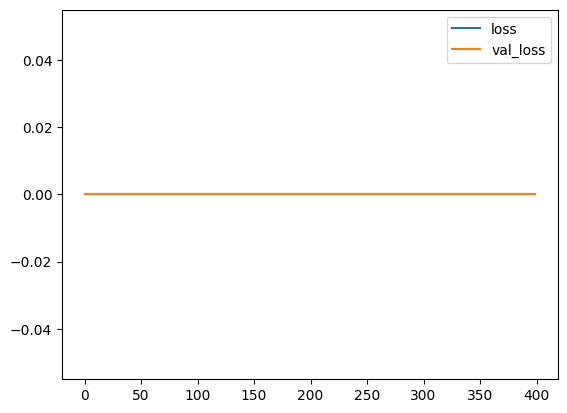

In [20]:
loss_df = pd.DataFrame(model.history.history)
loss_df[['loss', 'val_loss']].plot()


<Axes: >

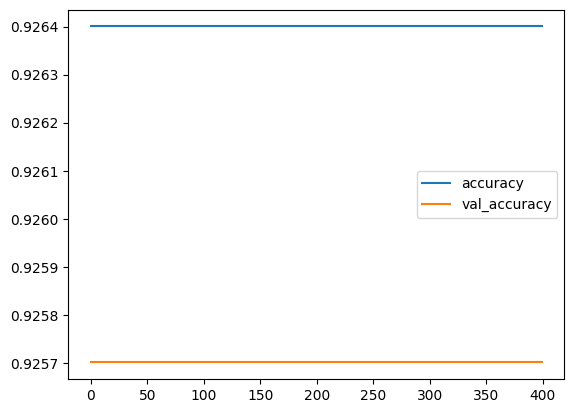

In [21]:
loss_df[['accuracy', 'val_accuracy']].plot()

In [22]:
 # compare the final model loss/accuracy/evaluation values
# the values should again match mostly
print("Test data evaluation:")
print(model.evaluate(X_test, y_test, verbose=0))
print("\nTrain data evaluation:")
print(model.evaluate(X_train, y_train, verbose=0))

Test data evaluation:
[0.0, 0.9258034229278564]

Train data evaluation:
[0.0, 0.9264002442359924]


In [23]:
# get predictions and convert with argmax() to get categories 
# instead of raw probabilities
test_predictions = model.predict(X_test)
test_predictions = np.argmax(test_predictions, axis=1)

# convert also y-test -values with argmax
y_test = np.argmax(y_test, axis=1)

936/936 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step


ValueError: `axis` must be fewer than the number of dimensions (1)

In [ ]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, test_predictions), xticklabels=categories, yticklabels=categories, annot=True, fmt='g')

In [ ]:
# In multi category classification , AUC values are often interpreted as follows: 
# 0.5-0.6 (failed)
# 0.6-0.7 (worthless)
# 0.7-0.8 (poor)
# 0.8-0.9 (good)
# > 0.9 (excellent)

# get ROC-AUC -score
roc_auc_score(y, model.predict(X), multi_class="ovr")